In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
#from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [ ]:
import pathlib

img = pathlib.Path('/content/drive/MyDrive/CNN/img')

In [ ]:
cv2.imread("/content/drive/MyDrive/CNN/img/train/car/car20.jpg").shape
#print(cv2.imread("/content/drive/MyDrive/CNN/img/train/car/Copie de car8.jpg"))
img1=cv2.imread("/content/drive/MyDrive/CNN/img/train/car/car20.jpg")

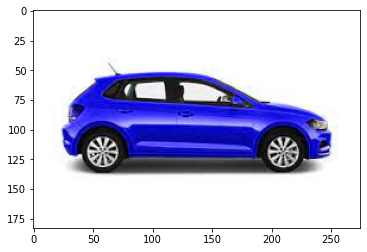

In [ ]:
plt.imshow(img1)

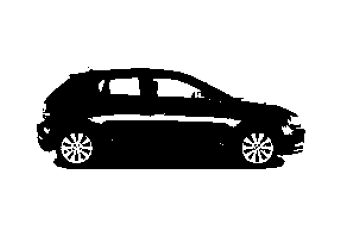

In [ ]:
#Convert to bw
img_bw = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
#img_bw = cv2.imdecode(img1, cv2.IMREAD_GRAYSCALE)
(thresh, img_bw) = cv2.threshold(img_bw, 127, 255, cv2.THRESH_BINARY)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_bw, cv2.COLOR_BGR2RGB))

[[-1 -1 -1]
 [ 1  1  1]
 [ 0  0  0]]


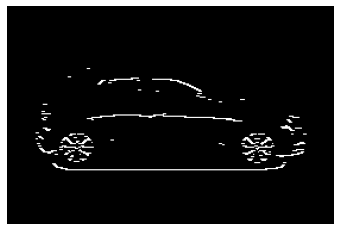

In [ ]:
kernel = np.matrix([[-1,-1,-1],[1,1,1],[0,0,0]])
print(kernel)
img_1 = cv2.filter2D(img_bw, -1, kernel)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))

[[ 0  0  0]
 [ 1  1  1]
 [-1 -1 -1]]


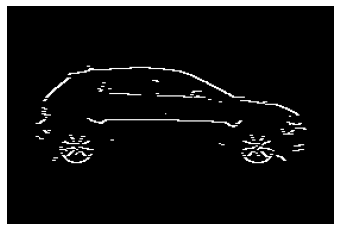

In [ ]:
kernel = np.matrix([[0,0,0],[1,1,1],[-1,-1,-1]])
print(kernel)
img_1 = cv2.filter2D(img_bw, -1, kernel)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))

[[-1  1  0]
 [-1  1  0]
 [-1  1  0]]


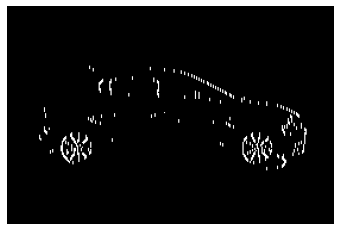

In [ ]:
kernel = np.matrix([[-1,1,0],[-1,1,0],[-1,1,0]])
print(kernel)
img_1 = cv2.filter2D(img_bw, -1, kernel)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))

In [ ]:
train = ImageDataGenerator(rescale= 1/255)
validation =ImageDataGenerator(rescale= 1/255)

In [ ]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/CNN/img/train',
                                          target_size= (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')

validation_dataset = validation.flow_from_directory('/content/drive/MyDrive/CNN/img/val',
                                          target_size= (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')

Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices
#train_dataset.classes

{'car': 0, 'tree': 1}

Sequential model= will connect together a list of layers in order

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu' ,input_shape =(200,200,3)), # give the input dimensions in the first layer [height, width, color channels(RGB)]
                                     tf.keras.layers.MaxPool2D(2,2),
                                      #
                                     tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                     tf.keras.layers.MaxPool2D(2,2),
                                      
                                     tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                     tf.keras.layers.MaxPool2D(2,2),
                                      ##
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(512,activation= 'relu'),
                                      ##
                                     tf.keras.layers.Dense(1,activation='sigmoid')
                                     ])

In [ ]:
model.compile(loss= "binary_crossentropy",
              optimizer ='adam',
              metrics =['binary_accuracy'])

In [ ]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 3,
                      epochs= 10,
                      validation_data= validation_dataset)

Epoch 1/10
3/3 [==============================] - 30s 9s/step - loss: 1.8578 - binary_accuracy: 0.4444 - val_loss: 1.5686 - val_binary_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 2s 809ms/step - loss: 1.1942 - binary_accuracy: 0.5556 - val_loss: 0.7555 - val_binary_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 2s 1s/step - loss: 0.8116 - binary_accuracy: 0.4286 - val_loss: 0.6253 - val_binary_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 3s 1s/step - loss: 0.5857 - binary_accuracy: 0.6667 - val_loss: 0.6547 - val_binary_accuracy: 0.5000
Epoch 5/10
3/3 [==============================] - 1s 463ms/step - loss: 0.6291 - binary_accuracy: 0.5556 - val_loss: 0.5376 - val_binary_accuracy: 0.9500
Epoch 6/10
3/3 [==============================] - 0s 61ms/step - loss: 0.4651 - binary_accuracy: 1.0000 - val_loss: 0.4787 - val_binary_accuracy: 0.7500
Epoch 7/10
3/3 [==============================] - 0s 58ms/step - loss: 0.3264 - binar

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 64)      

['car1.png', 'car.jpg', 'tree.jpg', 'tree1.jpg']


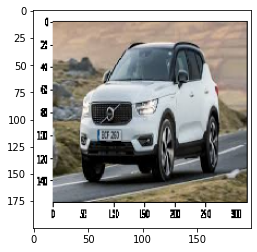

1/1 [==============================] - 0s 160ms/step
car


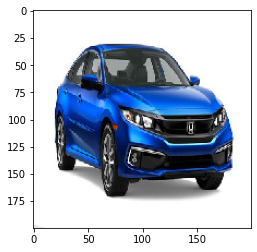

1/1 [==============================] - 0s 38ms/step
car


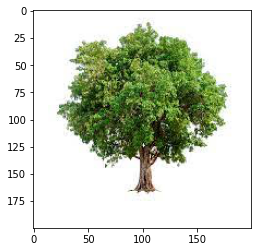

1/1 [==============================] - 0s 41ms/step
tree


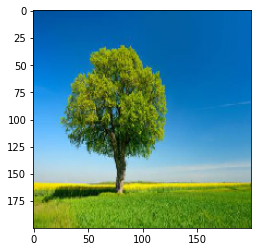

1/1 [==============================] - 0s 38ms/step
tree


In [ ]:
dir_path = '/content/drive/MyDrive/CNN/img/test'
print(os.listdir(dir_path))
for i in os.listdir(dir_path):
     img = image.load_img(dir_path+'/'+ i, target_size=(200,200))
     plt. imshow(img)
     plt.show()
     x=image.img_to_array(img)
     X = np.expand_dims(x,axis =0)
     images = np.vstack([X])
     val = model.predict(images)
     if val == 0:
         print("car")
     else:
         print("tree")

In [ ]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(model_fit.history)
# use Pandas native plot method
history_df['loss'].plot();

'''history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))'''

NameError: ignored

# Diff

In [ ]:
batch_size = 3
img_height = 200
img_width = 200

train_data = tf.keras.preprocessing.image_dataset_from_directory(
  img,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

val_data = tf.keras.preprocessing.image_dataset_from_directory(
  img,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = val_data.class_names
print(class_names)

Found 60 files belonging to 2 classes.
Using 48 files for training.
Found 60 files belonging to 2 classes.
Using 12 files for validation.
['class_Car', 'class_Tree']


In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,3,activation = 'relu' ,input_shape =(200,200,3)),
                                     tf.keras.layers.MaxPool2D(2,2),
                                      #
                                     tf.keras.layers.BatchNormalization(renorm=True),
                                     tf.keras.layers.Conv2D(32,3,activation = 'relu'),
                                     tf.keras.layers.Conv2D(32,3,activation = 'relu'),
                                     tf.keras.layers.MaxPool2D(2,2),
                                      #
                                     tf.keras.layers.BatchNormalization(renorm=True),
                                     tf.keras.layers.Conv2D(64,3,activation = 'relu'),
                                     tf.keras.layers.Conv2D(64,3,activation = 'relu'),
                                     tf.keras.layers.MaxPool2D(2,2),
                                      #
                                     tf.keras.layers.BatchNormalization(renorm=True),
                                     tf.keras.layers.Conv2D(128,3,activation = 'relu'),
                                     tf.keras.layers.Conv2D(128,3,activation = 'relu'),
                                     tf.keras.layers.MaxPool2D(2,2),
                                      ##
                                     tf.keras.layers.Flatten(), #Flatten layer comes after the base to transform the 2D feature data to 1D data needed by the classifier
                                     tf.keras.layers.Dense(512,activation= 'relu'),
                                     tf.keras.layers.Dense(1,activation= 'sigmoid'),
                                    ])

Notice in this definition is how the number of filters doubled block-by-block: 32, 64, 128. This is a common pattern. Since the MaxPool2D layer is reducing the size of the feature maps, we can afford to increase the quantity we create.

In [ ]:
model.compile(loss= "binary_crossentropy",
              optimizer ='adam',
              metrics =['binary_accuracy'])

In [ ]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 3,
                      epochs= 10,
                      validation_data= validation_dataset)

Epoch 1/10
3/3 [==============================] - 3s 702ms/step - loss: 0.7314 - binary_accuracy: 0.3333 - val_loss: 0.6854 - val_binary_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 2s 571ms/step - loss: 0.6272 - binary_accuracy: 0.6667 - val_loss: 0.6235 - val_binary_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 2s 582ms/step - loss: 0.6761 - binary_accuracy: 0.3333 - val_loss: 0.4830 - val_binary_accuracy: 0.8000
Epoch 4/10
3/3 [==============================] - 1s 506ms/step - loss: 0.3853 - binary_accuracy: 0.8571 - val_loss: 0.4241 - val_binary_accuracy: 0.8000
Epoch 5/10
3/3 [==============================] - 1s 584ms/step - loss: 0.2166 - binary_accuracy: 1.0000 - val_loss: 0.5605 - val_binary_accuracy: 0.8000
Epoch 6/10
3/3 [==============================] - 1s 576ms/step - loss: 0.0407 - binary_accuracy: 1.0000 - val_loss: 1.4279 - val_binary_accuracy: 0.8000
Epoch 7/10
3/3 [==============================] - 1s 576ms/step - loss: 0.48

['car1.png', 'car.jpg', 'tree.jpg', 'tree1.jpg']


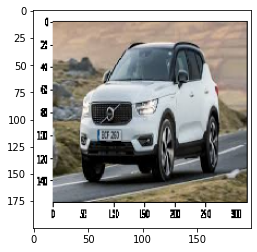

1/1 [==============================] - 0s 173ms/step
tree


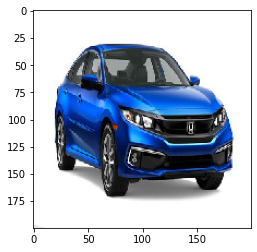

1/1 [==============================] - 0s 50ms/step
car


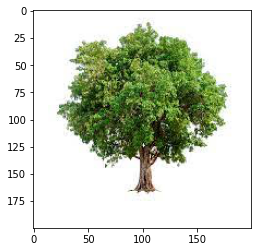

1/1 [==============================] - 0s 47ms/step
tree


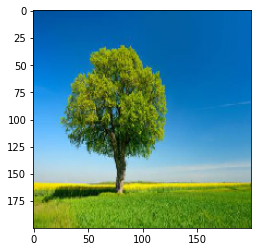

1/1 [==============================] - 0s 44ms/step
tree


In [ ]:
dir_path = '/content/drive/MyDrive/CNN/img/test'
print(os.listdir(dir_path))
for i in os.listdir(dir_path):
     img = image.load_img(dir_path+'/'+ i, target_size=(200,200))
     plt. imshow(img)
     plt.show()
     x=image.img_to_array(img)
     X = np.expand_dims(x,axis =0)
     images = np.vstack([X])
     val = model.predict(images)
     if val == 0:
         print("car")
     else:
         print("tree")

['car1.png', 'car.jpg', 'tree.jpg']


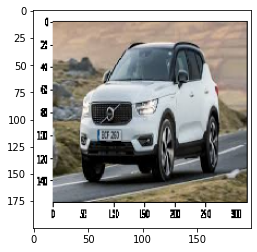

1/1 [==============================] - 0s 41ms/step
car


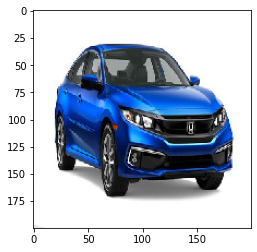

1/1 [==============================] - 0s 44ms/step
car


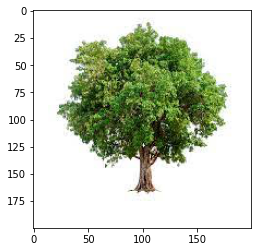

1/1 [==============================] - 0s 42ms/step
tree


In [ ]:
dir_path = '/content/drive/MyDrive/cnn_images/test'
print(os.listdir(dir_path))
for i in os.listdir(dir_path):
     img = image.load_img(dir_path+'/'+ i, target_size=(200,200))
     plt. imshow(img)
     plt.show()
     x=image.img_to_array(img)
     X = np.expand_dims (x,axis =0)
     images = np.vstack([X])
     val = model.predict(images)
     if val == 0:
         print("tree")
     else:
         print("car")


In [ ]:
'''tf.keras.layers.Conv2D(16,3,activation = 'relu' ,input_shape =(200,200,3)),
                                     tf.keras.layers.MaxPool2D(2,2),
                                      #
                                     tf.keras.layers.BatchNormalization(renorm=True),
                                     tf.keras.layers.Conv2D(32,3,activation = 'relu'),
                                     tf.keras.layers.Conv2D(32,3,activation = 'relu'),
                                     tf.keras.layers.MaxPool2D(2,2),
                                      #
                                     tf.keras.layers.Conv2D(64,3,activation = 'relu'),
                                     tf.keras.layers.Conv2D(64,3,activation = 'relu'),
                                     tf.keras.layers.MaxPool2D(2,2),
                                      #
                                     tf.keras.layers.BatchNormalization(renorm=True),
                                     tf.keras.layers.Conv2D(128,3,activation = 'relu'),
                                     tf.keras.layers.Conv2D(128,3,activation = 'relu'),
                                     tf.keras.layers.MaxPool2D(2,2),
                                      ##
                                     tf.keras.layers.Flatten(),
                                      ##
                                     tf.keras.layers.Dense(512,activation= 'relu'),
                                    
                                     tf.keras.layers.Dense(1,activation= 'sigmoid'),'''
                                    
                                    

In [ ]:
'''from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing import image_dataset_from_directory'''
